finished training


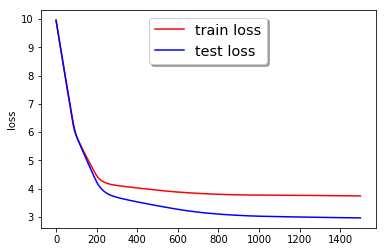

In [3]:
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

x_train,y_train=ds.load_svmlight_file("australian_scale.txt")#read data
x_train=x_train.toarray()
x_train=np.hstack((x_train,np.ones([np.shape(x_train)[0],1])))#add bis to x
y_train=y_train.reshape(np.shape(y_train)[0],1)
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.3)#split data

#n:number of examples
n=np.shape(x_train)[0]
#m:number of features
m=np.shape(x_train)[1]

#initialize parameters with zero
W=np.zeros((m,1))

#loss function
def loss(X,Y,W,C):
    l=0
    n,m=np.shape(X)
    for i in range(n):
        l+=max(0,1-Y[i]*W.T.dot(X[i]))
    l/=n
    l*=C
    l+=(W.T.dot(W)/2)[0][0]
    return l

#gradient function
def gradient(X,Y,W,C):
    m,n=X.shape
    M=np.zeros((m,1))
    for i in range(m):
        if 1-Y[i]*(W.T.dot(X[i]))>=0:
            M[i][0]=1
    _Y=M*Y
    g=W-C*X.T.dot(_Y)
    return g

L_train=[]
L_test=[]

#set hyper_parameter
lr=1e-6#learning rate
C=10
#begin training
for epoch in range(1500):
    #compute gradient
    g=gradient(x_train,y_train,W,C)
    #update theta
    W=W-lr*g
    #compute loss
    l_train=loss(x_train,y_train,W,C)
    L_train.append(l_train) 
    l_test=loss(x_test,y_test,W,C)
    L_test.append(l_test)
print('finished training')

#draw figures
plt.ylabel("loss")
plt.plot(L_train,color='red',label='train loss')
plt.plot(L_test,color='blue',label='test loss')
plt.legend(loc='upper center',shadow=True,fontsize='x-large')
plt.show()